In [11]:
import pandas as pd
import seaborn as sns

In [13]:
data_humanos = pd.read_csv("performances.csv")
data_humanos["fuente"] = "humanos"
data_humanos.head()

,group,round,player,choice,attendance,score,ac_score,fuente
0,Grupo-0001,1,jugador1a,1,2,-1,22,humanos
1,Grupo-0001,1,jugador2a,1,2,-1,22,humanos
2,Grupo-0001,2,jugador2a,1,1,1,22,humanos
3,Grupo-0001,2,jugador1a,0,1,0,22,humanos
4,Grupo-0001,3,jugador2a,0,1,0,22,humanos


In [14]:
data_humanos.columns = ["grupo","ronda","jugador","estado","asistencia","puntaje","puntaje_ac","fuente"]
data_humanos.head()

,grupo,ronda,jugador,estado,asistencia,puntaje,puntaje_ac,fuente
0,Grupo-0001,1,jugador1a,1,2,-1,22,humanos
1,Grupo-0001,1,jugador2a,1,2,-1,22,humanos
2,Grupo-0001,2,jugador2a,1,1,1,22,humanos
3,Grupo-0001,2,jugador1a,0,1,0,22,humanos
4,Grupo-0001,3,jugador2a,0,1,0,22,humanos


In [16]:
columnas = ["grupo","ronda","jugador","estado","puntaje","fuente"]
data_humanos = data_humanos[columnas]
data_humanos.head()

,grupo,ronda,jugador,estado,puntaje,fuente
0,Grupo-0001,1,jugador1a,1,-1,humanos
1,Grupo-0001,1,jugador2a,1,-1,humanos
2,Grupo-0001,2,jugador2a,1,1,humanos
3,Grupo-0001,2,jugador1a,0,0,humanos
4,Grupo-0001,3,jugador2a,0,0,humanos


In [17]:
data_aleatorios = pd.read_csv("simulations.csv")
data_aleatorios["fuente"] = "aleatorio"
data_aleatorios.head()

,Unnamed: 0,Ronda,Agente,Estado,Puntaje,id,fuente
0,0,0,0,1,-1,0,aleatorio
1,1,1,0,0,0,0,aleatorio
2,2,2,0,1,-1,0,aleatorio
3,3,3,0,1,-1,0,aleatorio
4,4,4,0,1,1,0,aleatorio


In [18]:
data_aleatorios.columns = ["index","ronda","jugador","estado","puntaje","grupo","fuente"]
data_aleatorios.head()

,index,ronda,jugador,estado,puntaje,grupo,fuente
0,0,0,0,1,-1,0,aleatorio
1,1,1,0,0,0,0,aleatorio
2,2,2,0,1,-1,0,aleatorio
3,3,3,0,1,-1,0,aleatorio
4,4,4,0,1,1,0,aleatorio


In [19]:
columnas = ["grupo","ronda","jugador","estado","puntaje","fuente"]
data_aleatorios = data_aleatorios[columnas]
data_aleatorios.head()

,grupo,ronda,jugador,estado,puntaje,fuente
0,0,0,0,1,-1,aleatorio
1,0,1,0,0,0,aleatorio
2,0,2,0,1,-1,aleatorio
3,0,3,0,1,-1,aleatorio
4,0,4,0,1,1,aleatorio


In [21]:
data = pd.concat([data_humanos,data_aleatorios])
data.head()

,grupo,ronda,jugador,estado,puntaje,fuente
0,Grupo-0001,1,jugador1a,1,-1,humanos
1,Grupo-0001,1,jugador2a,1,-1,humanos
2,Grupo-0001,2,jugador2a,1,1,humanos
3,Grupo-0001,2,jugador1a,0,0,humanos
4,Grupo-0001,3,jugador2a,0,0,humanos


In [23]:
df_pagos = data.groupby(["fuente","grupo","jugador"])["puntaje"].sum().reset_index()
df_pagos.head()

,fuente,grupo,jugador,puntaje
0,aleatorio,0,0,-1
1,aleatorio,0,1,8
2,aleatorio,1,0,3
3,aleatorio,1,1,1
4,aleatorio,2,0,0


<AxesSubplot:xlabel='puntaje', ylabel='fuente'>

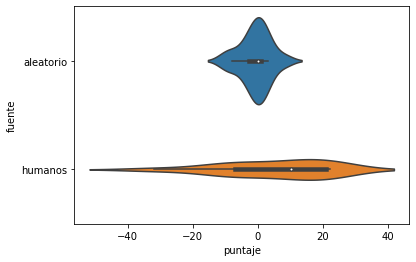

In [25]:
sns.violinplot(data = df_pagos, x = "puntaje", y = "fuente")

In [27]:
df_asistencias = data.groupby(["fuente","grupo","jugador"])["estado"].mean().reset_index()
df_asistencias.head()

,fuente,grupo,jugador,estado
0,aleatorio,0,0,0.387755
1,aleatorio,0,1,0.571429
2,aleatorio,1,0,0.551020
3,aleatorio,1,1,0.510204
4,aleatorio,2,0,0.530612


<AxesSubplot:xlabel='estado', ylabel='fuente'>

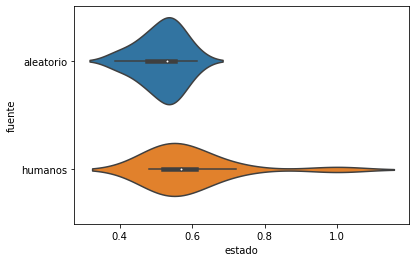

In [29]:
sns.violinplot(data = df_asistencias, x = "estado", y = "fuente")

In [30]:
df_aforo = data.groupby(["fuente","grupo","ronda"])["aforo"].sum().reset_index()
df_aforo.head()

,fuente,grupo,ronda,estado
0,aleatorio,0,0,2
1,aleatorio,0,1,0
2,aleatorio,0,2,2
3,aleatorio,0,3,2
4,aleatorio,0,4,1


In [33]:
columnas = ["fuente","grupo","ronda","aforo"]
df_aforo.columns =columnas
df_aforo.head()

,fuente,grupo,ronda,aforo
0,aleatorio,0,0,2
1,aleatorio,0,1,0
2,aleatorio,0,2,2
3,aleatorio,0,3,2
4,aleatorio,0,4,1


<AxesSubplot:xlabel='ronda', ylabel='aforo'>

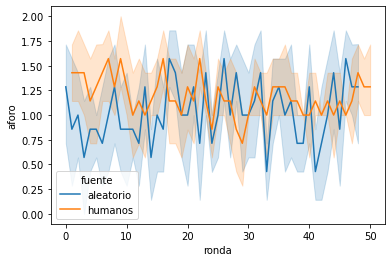

In [35]:
sns.lineplot(data = df_aforo, x = "ronda", y = "aforo", hue = "fuente")